In [1]:
import QuantLib as ql
import matplotlib.pyplot as plt
import datetime
import pandas as pd

from nowquotes import download
from wmDownloader import getOptionsInfo,getHistoryQuotesInfo

%matplotlib inline

In [2]:
risk_free_rate = 0.03 #无风险利率 优化点1  0.005 利率差 对应期权0.1%价格波动，变化不大
dividend_rate =  0
day_count = ql.Actual365Fixed()  #一年的日期数 优化点2  

In [3]:
def calculateImpliedVolatility(option_price,spot_price,strike_price,calculation_date,maturity_date,option_type):
    volatility = 0
    calendar = ql.China() 
    payoff = ql.PlainVanillaPayoff(option_type, strike_price)  
    exercise = ql.EuropeanExercise(maturity_date) 
    european_option = ql.VanillaOption(payoff, exercise) 
    spot_handle = ql.QuoteHandle(  
        ql.SimpleQuote(spot_price)
    )
    flat_ts = ql.YieldTermStructureHandle( 
        ql.FlatForward(calculation_date, risk_free_rate, day_count)
    )  
    dividend_yield = ql.YieldTermStructureHandle(
        ql.FlatForward(calculation_date, dividend_rate, day_count)
    ) 
    flat_vol_ts = ql.BlackVolTermStructureHandle(
        ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)  
    )
    bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                               dividend_yield, 
                                               flat_ts, 
                                               flat_vol_ts)
    vol = european_option.impliedVolatility(option_price,bsm_process)
    
    flat_vol_ts2 = ql.BlackVolTermStructureHandle(
        ql.BlackConstantVol(calculation_date, calendar, vol, day_count)  
    )
    bsm_process2 = ql.BlackScholesMertonProcess(spot_handle, 
                                           dividend_yield, 
                                           flat_ts, 
                                           flat_vol_ts2)
    european_option2 = ql.VanillaOption(payoff, exercise) 
    european_option2.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process2))
    print european_option2.gamma()
#     print european_option2.NPV() - option_price
    return vol

In [4]:
downloader = download()
data = downloader.all
spot_price = downloader.targetPrice #标的价格 优化点3
# spot_price = 2.293
data[0]

wmDownloader.py:68: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  future_dates.sort()


OP_UP_5100501701
OP_DOWN_5100501701
OP_UP_5100501702
OP_DOWN_5100501702
OP_UP_5100501703
OP_DOWN_5100501703
OP_UP_5100501706
OP_DOWN_5100501706


,amount,buy_price,buy_volume,change_pct,high,high_limit,hold_volume,low,low_limit,name,now_price,open,prev_close,sell_price,sell_volume,status,strike_price,target,update_time,volume
10000749,2320321.21,0.0578,2,3.20,0.0657,0.2842,10989,0.0538,0.0001,50ETF购1月2250A,0.0580,0.0562,0.0562,0.0585,1,A,2.25,510050,2016-12-29 15:00:00,3818
10000750,2006577.43,0.0343,1,3.00,0.0394,0.2590,15459,0.0316,0.0001,50ETF购1月2299A,0.0343,0.0334,0.0333,0.0344,17,A,2.299,510050,2016-12-29 15:00:00,5580
10000751,596177.57,0.0194,17,0.00,0.0225,0.2402,10290,0.0180,0.0001,50ETF购1月2348A,0.0194,0.0195,0.0194,0.0196,2,A,2.348,510050,2016-12-29 15:00:00,2919
10000752,437640.84,0.0104,23,-6.31,0.0124,0.2270,9310,0.0098,0.0001,50ETF购1月2397A,0.0104,0.0110,0.0111,0.0106,1,A,2.397,510050,2016-12-29 15:00:00,3869
10000753,159793.79,0.0057,23,-13.64,0.0070,0.2176,13309,0.0056,0.0001,50ETF购1月2446A,0.0057,0.0064,0.0066,0.0059,10,A,2.446,510050,2016-12-29 15:00:00,2494
10000761,90868.06,0.0033,19,-17.50,0.0040,0.2101,12606,0.0032,0.0001,50ETF购1月2495A,0.0033,0.0040,0.0040,0.0034,20,A,2.495,510050,2016-12-29 15:00:00,2435
10000777,16982654.00,0.0333,21,2.13,0.0393,0.2584,96916,0.0307,0.0001,50ETF购1月2300,0.0335,0.0318,0.0328,0.0335,212,M,2.3,510050,2016-12-29 15:00:00,48858
10000778,5043865.00,0.0189,11,-1.04,0.0225,0.2398,83107,0.0175,0.0001,50ETF购1月2350,0.0190,0.0195,0.0192,0.019,69,M,2.35,510050,2016-12-29 15:00:00,25603
10000779,1374764.00,0.0098,2,-3.92,0.0116,0.2258,65453,0.0087,0.0001,50ETF购1月2400,0.0098,0.0102,0.0102,0.0099,2,M,2.4,510050,2016-12-29 15:00:00,13605
10000780,447792.00,0.0056,7,-8.20,0.0066,0.2167,41537,0.0050,0.0001,50ETF购1月2450,0.0056,0.0061,0.0061,0.0057,6,M,2.45,510050,2016-12-29 15:00:00,7873


In [5]:
options_info = getOptionsInfo(True)
options_info.head(3)

,contMultNum,contractStatus,contractType,currencyCD,deliDate,delistDate,exchangeCD,exerDate,expDate,expMonth,...,listDate,secID,secShortName,strikePrice,tickerSymbol,varExchangeCD,varSecID,varShortName,varTicker,varType
optID,,,,,,,,,,,,,,,,,,,,,
10000001,10000,DE,CO,CNY,2015-03-26,2015-03-25,XSHG,2015-03-25,2015-03-25,3,...,2015-02-09,510050C1503M02200.XSHG,50ETF购3月2200,2.20,510050C1503M02200,XSHG,510050.XSHG,华夏上证50ETF,510050,F
10000002,10000,DE,CO,CNY,2015-03-26,2015-03-25,XSHG,2015-03-25,2015-03-25,3,...,2015-02-09,510050C1503M02250.XSHG,50ETF购3月2250,2.25,510050C1503M02250,XSHG,510050.XSHG,华夏上证50ETF,510050,F
10000003,10000,DE,CO,CNY,2015-03-26,2015-03-25,XSHG,2015-03-25,2015-03-25,3,...,2015-02-09,510050C1503M02300.XSHG,50ETF购3月2300,2.30,510050C1503M02300,XSHG,510050.XSHG,华夏上证50ETF,510050,F


In [6]:
idx = 0
vol_dfs = []
for df in data:
    option_type = (ql.Option.Call if idx < 4 else ql.Option.Put)
    vol_df = pd.DataFrame(index=list(df["strike_price"]),columns=['bid','ask'])
    for index,row in df.iterrows():
        buy_price = row["buy_price"]
        sell_price = row["sell_price"]
        strike_price = row["strike_price"]
        exer_date = options_info["exerDate"][index]
        exer_datetime = datetime.datetime.strptime(exer_date,"%Y-%m-%d")
        maturity_date = ql.Date(exer_datetime.day, exer_datetime.month, exer_datetime.year) #交割日
        update_time = row["update_time"]
        update_datetime = datetime.datetime.strptime(update_time,"%Y-%m-%d %H:%M:%S")
        calculation_date = ql.Date(update_datetime.day, update_datetime.month, update_datetime.year) #交割日
        try:
            buy_vol = calculateImpliedVolatility(buy_price,spot_price,strike_price,calculation_date,maturity_date,option_type)
            sell_vol = calculateImpliedVolatility(sell_price,spot_price,strike_price,calculation_date,maturity_date,option_type)
            vol_df.set_value(strike_price,"bid",buy_vol)
            vol_df.set_value(strike_price,"ask",sell_vol)
#             print buy_vol,sell_vol
        except Exception,e:
            print buy_price,spot_price,strike_price
    vol_df = vol_df.sort_index()
    vol_dfs.append(vol_df)
    idx += 1

3.78863209303
3.72594947858
3.79172849449
3.78276871888
3.10652654872
3.0955905185
2.23179087462
2.23072692664
1.46836774699
1.47739933377
0.938543269906
0.947642544849
3.83896504717
3.82064760239
3.07367540537
3.06837587693
2.17954524704
2.17946968928
1.42431785111
1.42910676315
0.884015006165
0.893729815617
0.616792787648
0.637165542769
3.82539382984
3.81613758314
2.79963834974
2.79796608836
2.39425632412
2.38799646057
2.85997028002
2.76902042101
2.75082394
2.74137661865
2.46852772904
2.46486049044
2.06267024633
2.06053555381
0.234 2.278 2.055
0.954801128497
1.00912733737
1.62372706337
1.61070069174
2.04428664715
1.97961500443
2.21261083678
2.14269307204
2.1535730391
2.13337115647
2.06014446645
1.99698403974
1.7916583504
1.77683097072
1.5487257889
1.54637839283
1.29817933878
1.29726247888
2.17829890285
2.16645456045
2.01836940241
1.99368596769
1.7732366656
1.77141849332
1.52253301236
1.52029900792
1.27514664031
1.2743962619
1.04832699884
1.0486717538
2.21261083678
2.1456416236
2.0335

In [7]:
vol_dfs[0].tail(5)

,bid,ask
2.446,0.19507,0.196857
2.450,0.197492,0.198418
2.495,0.20712,0.208487
2.500,0.206575,0.207998
2.550,0.229442,0.233036


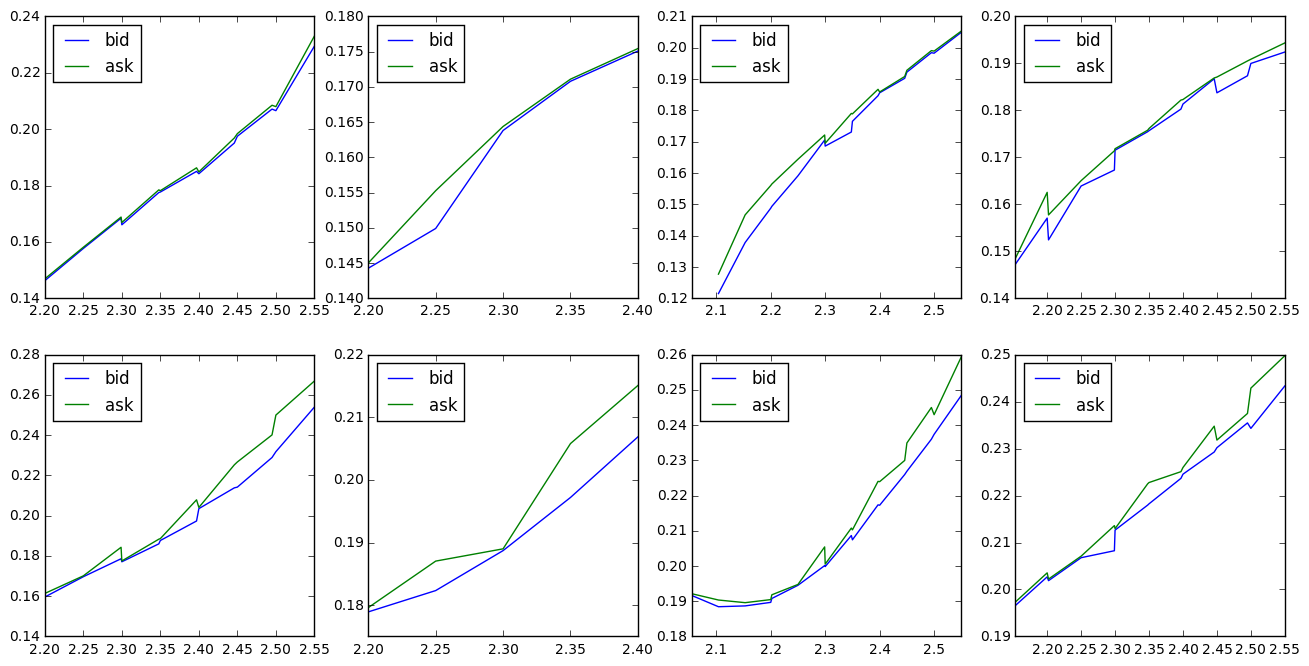

In [8]:
f, axarr = plt.subplots(2, 4,figsize=(16,8))
for i in range(0,8):
    vol_df = vol_dfs[i]
    ax = axarr[i / 4,i % 4]
#     ax.plot(vol_df["bid"])
    vol_df.plot(ax = ax)

In [9]:
def get_vol(df,option_type,spot_price):
    vol_df = pd.DataFrame(index=list(df["strike_price"]),columns=['bid','ask'])
    for index,row in df.iterrows():
        buy_price = row["buy_price"]
        sell_price = row["sell_price"]
        strike_price = row["strike_price"]
        exer_date = options_info["exerDate"][index]
        exer_datetime = datetime.datetime.strptime(exer_date,"%Y-%m-%d")
        maturity_date = ql.Date(exer_datetime.day, exer_datetime.month, exer_datetime.year) #交割日
        update_time = row["update_time"]
        update_datetime = datetime.datetime.strptime(update_time,"%Y-%m-%d %H:%M:%S")
        calculation_date = ql.Date(update_datetime.day, update_datetime.month, update_datetime.year) #交割日
        try:
            buy_vol = calculateImpliedVolatility(buy_price,spot_price,strike_price,calculation_date,maturity_date,option_type)
            sell_vol = calculateImpliedVolatility(sell_price,spot_price,strike_price,calculation_date,maturity_date,option_type)
            vol_df.set_value(strike_price,"bid",buy_vol)
            vol_df.set_value(strike_price,"ask",sell_vol)
#             print buy_vol,sell_vol
        except Exception,e:
            continue
#             print buy_price,spot_price,strike_price
    vol_df = vol_df.sort_index()
    return vol_df

In [10]:
delta_se = pd.Series()
vol_se = pd.Series()
for i in range(-20,20):
    fix_spot_price = spot_price + float(i)/1000
    call_df = data[0]
    put_df = data[4]
    call_df = call_df.drop_duplicates(subset="strike_price")
    put_df = put_df.drop_duplicates(subset="strike_price")
    call_vol_df = get_vol(call_df,ql.Option.Call,fix_spot_price)
    put_vol_df = get_vol(put_df,ql.Option.Put,fix_spot_price)
    delta = (call_vol_df["ask"] - put_vol_df["ask"]).abs().dropna()
    delta_se[fix_spot_price] = delta.min()
    vol_se[fix_spot_price] = call_vol_df["ask"][delta.idxmin()]

3.082533972
3.04099898122
3.08957060465
3.08368851936
2.59850972915
2.59138648994
1.91560227952
1.91609767682
1.28973627713
1.2987018772
0.84028724185
0.848551117927
3.12033446187
3.10837026576
2.57361577429
2.5701795328
1.87214709309
1.87274043944
1.25392645269
1.2585837961
0.792367043705
0.801352213039
0.562354549256
0.581344286533
2.56505932296
2.56091692006
4.62657792274
4.59965938681
4.62191120676
4.44770204673
2.15584682182
2.39607111916
4.65842541681
4.64542731715
1.96776108893
2.0944711068
3.5152852172
3.49721145281
3.1115209087
3.06918941388
3.11831002226
3.11231409722
2.62004372958
2.61277246413
1.92940864643
1.92984424041
1.29771738451
1.30669352103
0.844761520843
0.853088217558
3.1496832886
3.13748493741
2.59483715688
2.59132861962
1.88553957756
1.88615263281
1.26155465415
1.26621878085
0.796546357652
0.805562498231
0.564869677789
0.583923998412
2.58335327002
2.57916527322
4.5578786876
4.53173760874
4.55963685548
4.38922055831
2.59713482927
2.71446578408
4.59607661937
4.583

In [11]:
vol_se = vol_se.astype(float)

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


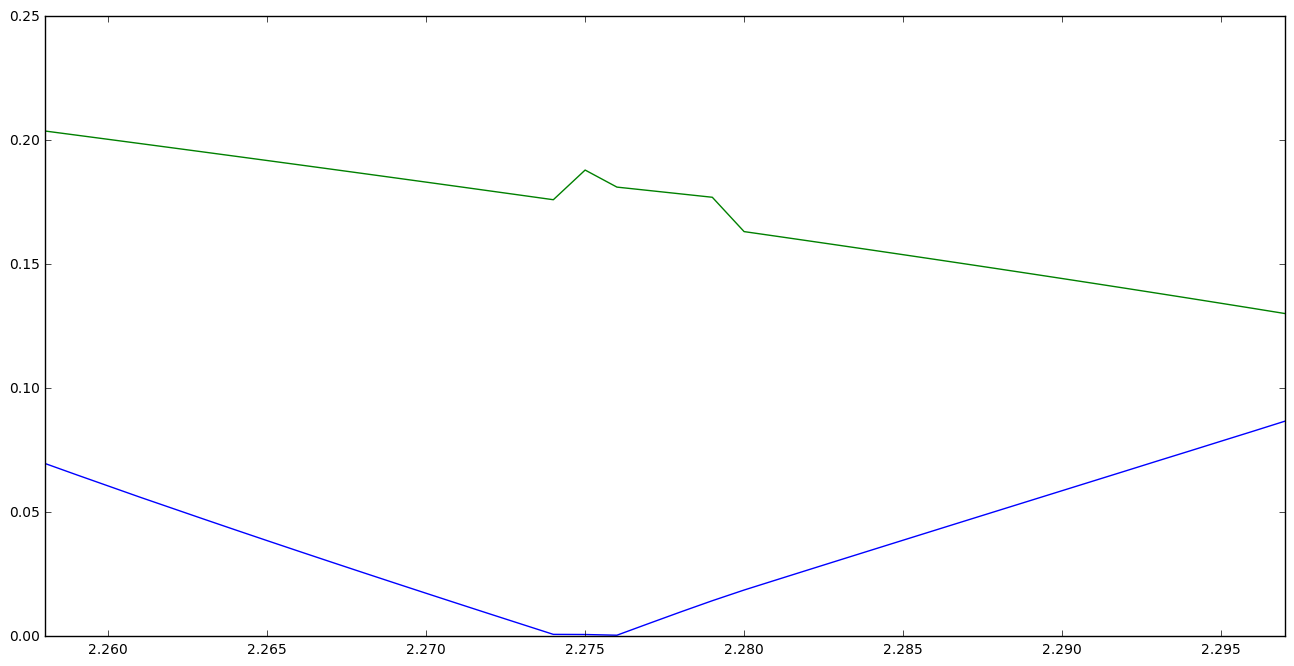

In [12]:
print delta_se.plot(figsize=(16,8))
print vol_se.plot(figsize=(16,8))

In [12]:
vol_se.head(3)

2.259    0.253152
2.260    0.247719
2.261    0.242143
dtype: float64